In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns
from sklearn import datasets, linear_model

In [2]:
data = pd.read_csv(r'C:\Users\shanmukh\Desktop\Data Science\CSV Files\Placement_Data_Full_Class.csv')
data.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [3]:
data.shape

(215, 15)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [5]:
data.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

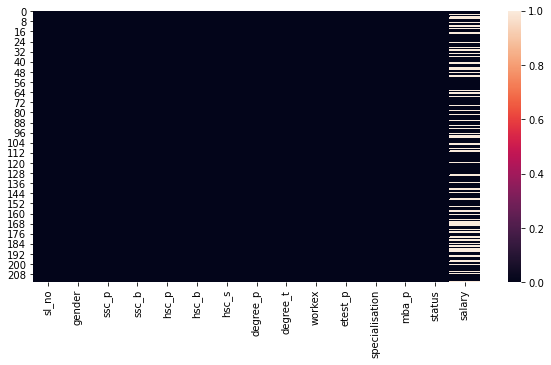

In [6]:
plt.figure(figsize=(10,5))
sns.heatmap(data.isnull())

In [7]:
data=data.fillna(data.mean())

In [8]:
data.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.000000
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.000000
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.000000
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,288655.405405
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.000000


In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
le = LabelEncoder()

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          215 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [12]:
data['gender']=le.fit_transform(data['gender']) 
data['ssc_b']=le.fit_transform(data['ssc_b']) 
data['hsc_s']=le.fit_transform(data['hsc_s']) 
data['hsc_b']=le.fit_transform(data['hsc_b']) 
data['degree_t']=le.fit_transform(data['degree_t'])
data['workex']=le.fit_transform(data['workex'])
data['specialisation']=le.fit_transform(data['specialisation'])
data['status']=le.fit_transform(data['status'])





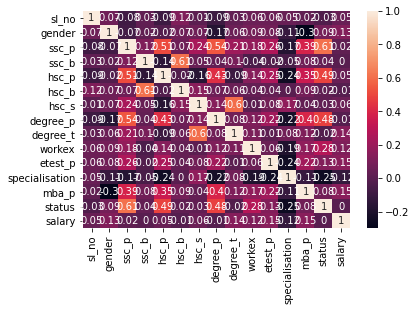

In [13]:
corr=data.corr().round(2)
#plt.figure(figsize=(15,10))
sns.heatmap(data=corr,annot=True)

In [14]:
data.corr()["salary"].sort_values(ascending = False)

salary            1.000000e+00
etest_p           1.528286e-01
mba_p             1.463245e-01
degree_t          1.414271e-01
gender            1.291073e-01
workex            1.184562e-01
hsc_s             5.998181e-02
hsc_p             5.450558e-02
sl_no             5.155040e-02
ssc_p             2.357072e-02
ssc_b             4.603322e-03
status            9.450535e-17
hsc_b            -6.247140e-03
degree_p         -1.414817e-02
specialisation   -1.174086e-01
Name: salary, dtype: float64

In [15]:
data.columns

Index(['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p',
       'status', 'salary'],
      dtype='object')

In [16]:
data.describe

<bound method NDFrame.describe of      sl_no  gender  ssc_p  ssc_b  hsc_p  hsc_b  hsc_s  degree_p  degree_t  \
0        1       1  67.00      1  91.00      1      1     58.00         2   
1        2       1  79.33      0  78.33      1      2     77.48         2   
2        3       1  65.00      0  68.00      0      0     64.00         0   
3        4       1  56.00      0  52.00      0      2     52.00         2   
4        5       1  85.80      0  73.60      0      1     73.30         0   
..     ...     ...    ...    ...    ...    ...    ...       ...       ...   
210    211       1  80.60      1  82.00      1      1     77.60         0   
211    212       1  58.00      1  60.00      1      2     72.00         2   
212    213       1  67.00      1  67.00      1      1     73.00         0   
213    214       0  74.00      1  66.00      1      1     58.00         0   
214    215       1  62.00      0  58.00      1      2     53.00         0   

     workex  etest_p  specialisation  mba

In [45]:
#Scaling data 
from sklearn.preprocessing import StandardScaler

In [46]:
scalar=StandardScaler()

In [48]:
X_train=scalar.fit_transform(X_train)
X_test=scalar.fit_transform(X_test)

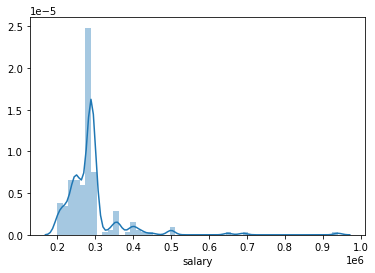

In [49]:
sns.distplot(data['salary'])

In [50]:
data['status'].value_counts()

1    148
0     67
Name: status, dtype: int64

In [51]:
X=data.drop('status',axis=1)
y=data['status']

In [52]:
from imblearn.over_sampling import RandomOverSampler
rus = RandomOverSampler(random_state=0)
X_res, y_res =  rus.fit_resample(X, y)

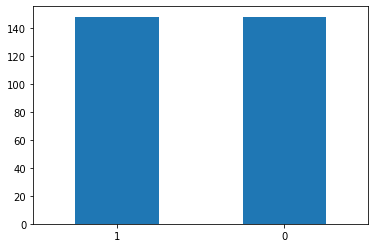

In [53]:
y_res.value_counts().plot(kind = 'bar', rot=0)

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X_train,X_test,y_train,y_test = train_test_split(X_res,y_res,test_size=0.4,random_state=42)

In [56]:
#KNeighbors Classifiers
from sklearn.neighbors import KNeighborsClassifier

In [57]:
#Setup arrays to store training and test accuracies
neighbors = np.arange(1,20)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

In [58]:
for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)

In [59]:
#Fit the model
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=19)

In [60]:
#Compute accuracy on the training set
train_accuracy[i] = knn.score(X_train, y_train)

In [61]:
#Compute accuracy on the test set
test_accuracy[i] = knn.score(X_test, y_test) 

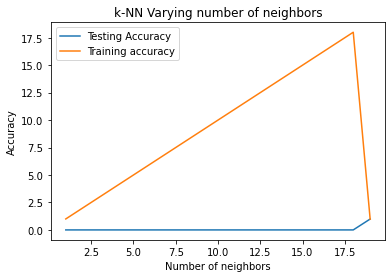

In [62]:
#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [63]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=17)

In [64]:
#Fit the model
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=17)

In [65]:
knn.score(X_test,y_test)

0.9915966386554622

In [66]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix

In [67]:
#Predictions using classifier
y_pred = knn.predict(X_test)

In [68]:
confusion_matrix(y_test,y_pred)

array([[57,  0],
       [ 1, 61]], dtype=int64)

In [69]:
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,57,0,57
1,1,61,62
All,58,61,119


In [70]:
#import classification_report
from sklearn.metrics import classification_report

In [71]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        57
           1       1.00      0.98      0.99        62

    accuracy                           0.99       119
   macro avg       0.99      0.99      0.99       119
weighted avg       0.99      0.99      0.99       119

